In [1]:
import json
import pandas as pd
from collections import Counter 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re
from IPython.display import display

# Download NLTK resources (uncomment if not already downloaded)
# nltk.download('stopwords')
# nltk.download('punkt')

# Load the JSON file
with open('/home/bfh/irsed/daten/ProgLang/24_5/prog_lang.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convert to DataFrame for easier analysis
df = pd.DataFrame(data)

# Display the first 5 entries of the dataframe as a beautiful table

print("\nFirst 5 entries:")
def truncate_text(val):
    if isinstance(val, str) and len(val) > 50:
        return val[:50] + "..."
    return val

display(df.head(5).style.format(truncate_text).set_properties(**{'text-align': 'left'}).set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('color', '#333'), ('font-weight', 'bold')]}]
))


First 5 entries:


In [2]:
# Display basic information about the dataset
print(f"Number of records: {len(df)}")
print(f"\nlen of colums {len(df.columns)} columns in the dataset:")
for col in df.columns:
    print(f"- {col}")

Number of records: 24

len of colums 431 columns in the dataset:
- title
- url
- history
- versioning
- features
- examples
- see_also
- references
- further_reading
- document
- paradigm
- first_appeared
- stable_release
- typing_discipline
- influenced_by
- influenced
- stable_release_date
- origins
- commercial_development
- recent_history
- release_history
- syntax
- variables
- vectors_and_matrices
- structures
- functions
- function_handles
- classes_and_object_oriented_programming
- graphics_and_graphical_user_interface_programming
- matlab_and_other_languages
- relations_to_us_sanctions
- notes
- external_links
- early_years_
- mozilla_sponsorship_
- evolution_
- servo_and_early_adoption_
- mozilla_layoffs_and_rust_foundation_present
- syntax_and_features
- hello_world_program
- block_expressions_and_control_flow
- if_expressions
- while_loops
- for_loops_and_iterators
- loop_and_break_statements
- pattern_matching
- types
- primitive_types
- user_defined_types
- standard_libra

In [3]:
# Find columns with no null values
non_null_columns = []
for col in df.columns:
    if not df[col].isnull().any():
        non_null_columns.append(col)

print("\nColumns with no null values:")
for col in non_null_columns:
    print(f"- {col}")

# Also show total counts
print(f"\nSummary: {len(non_null_columns)} out of {len(df.columns)} columns have no null values")

# Alternatively, you can see the null value count for each column
print("\nNull value counts for all columns:")
null_counts = df.isnull().sum().sort_values(ascending=True)
for col, count in null_counts.items():
    if count > 0:
        percentage = (count / len(df)) * 100
        print(f"- {col}: {count} nulls ({percentage:.2f}%)")


Columns with no null values:
- title
- url
- document
- paradigm
- first_appeared
- stable_release
- typing_discipline
- stable_release_date

Summary: 8 out of 431 columns have no null values

Null value counts for all columns:
- influenced_by: 1 nulls (4.17%)
- see_also: 2 nulls (8.33%)
- external_links: 2 nulls (8.33%)
- influenced: 4 nulls (16.67%)
- references: 6 nulls (25.00%)
- history: 7 nulls (29.17%)
- further_reading: 9 nulls (37.50%)
- syntax: 15 nulls (62.50%)
- notes: 15 nulls (62.50%)
- features: 16 nulls (66.67%)
- implementations: 17 nulls (70.83%)
- hello_world: 19 nulls (79.17%)
- sources: 19 nulls (79.17%)
- generics: 19 nulls (79.17%)
- versions: 20 nulls (83.33%)
- concurrency: 20 nulls (83.33%)
- bibliography: 20 nulls (83.33%)
- design: 20 nulls (83.33%)
- citations: 20 nulls (83.33%)
- applications: 21 nulls (87.50%)
- adoption: 21 nulls (87.50%)
- performance: 21 nulls (87.50%)
- criticism: 21 nulls (87.50%)
- functions: 21 nulls (87.50%)
- typing: 21 nulls (8

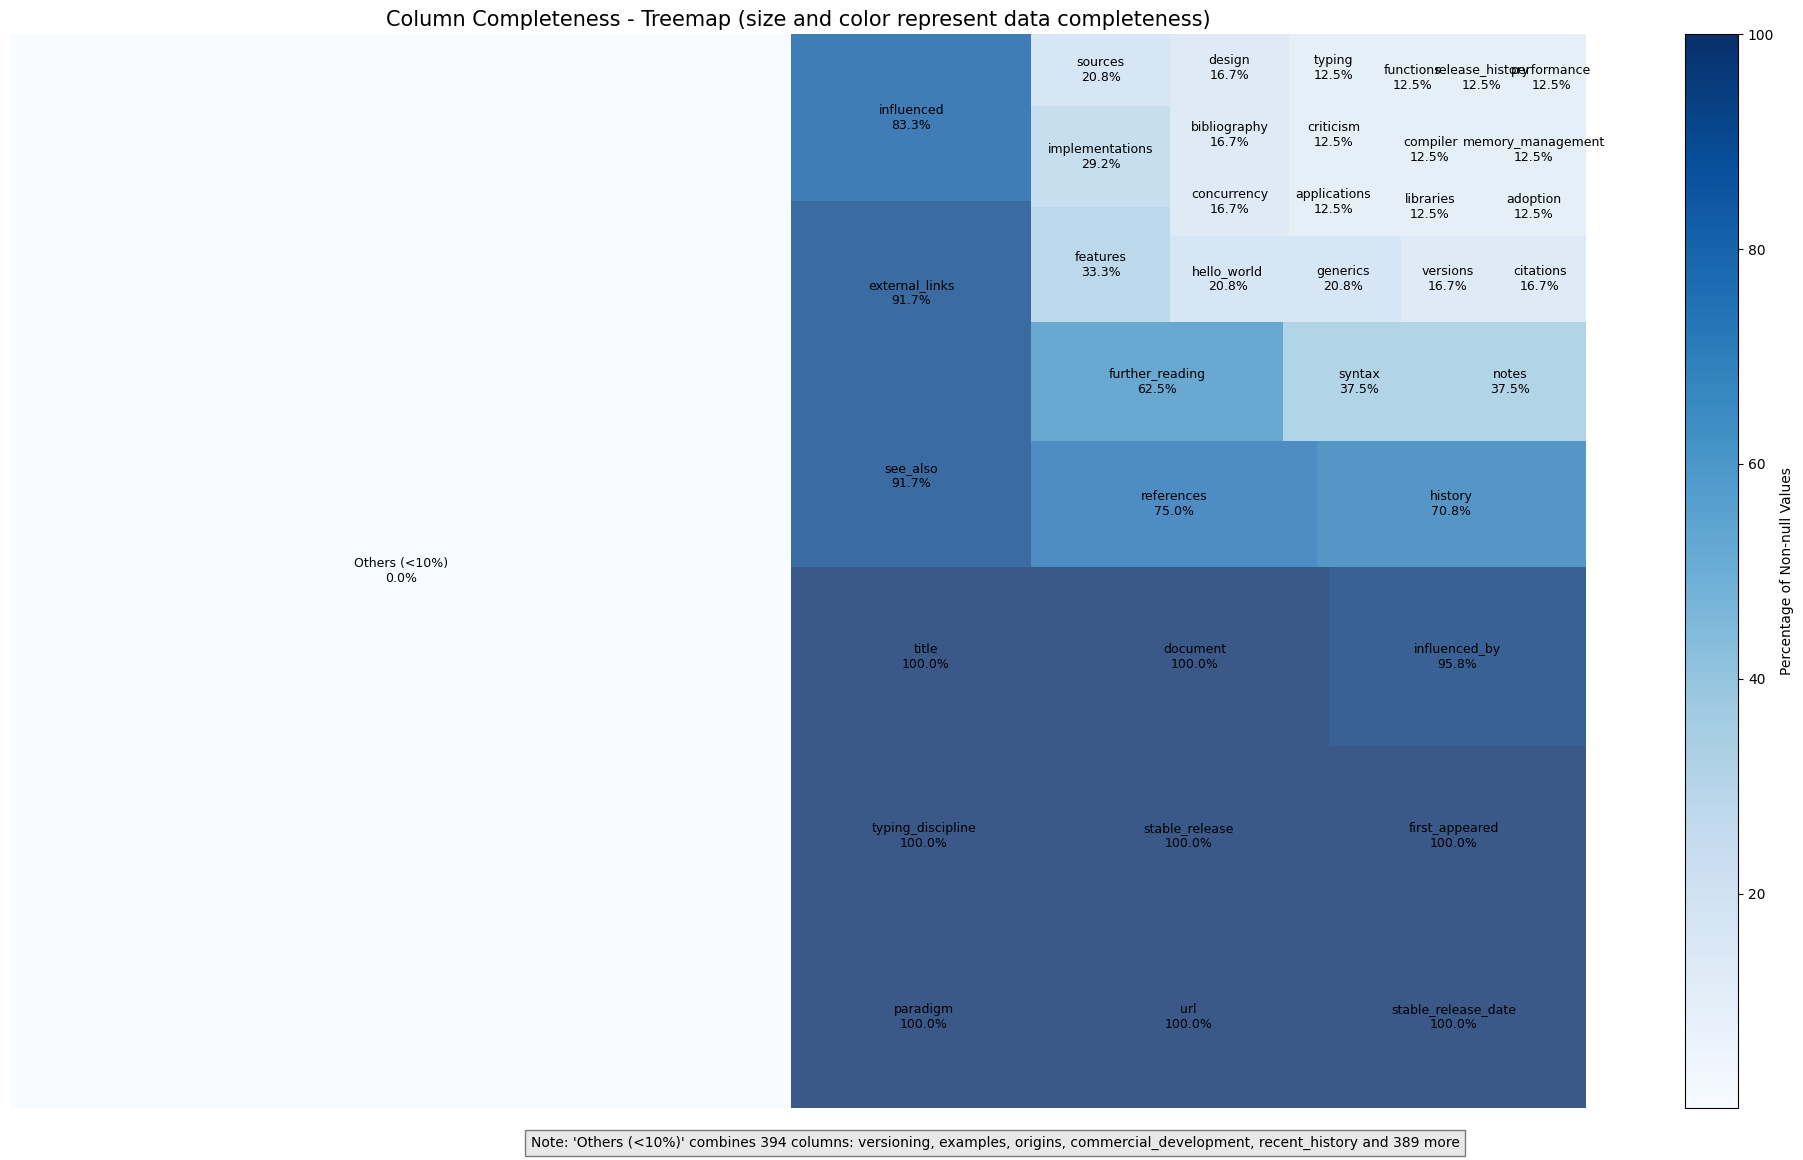

In [4]:
import squarify
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get counts of non-null values for each column
non_null_counts = len(df) - df.isnull().sum()

# Calculate percentages
percentages = (non_null_counts / len(df)) * 100

# Group columns with less than 10% non-null values
low_percentage_cols = percentages[percentages < 10].index.tolist()
high_percentage_cols = percentages[percentages >= 10].index.tolist()

# Create a new series with the grouped data
grouped_counts = non_null_counts[high_percentage_cols].copy()
if low_percentage_cols:
    # Sum the counts of all low percentage columns
    grouped_counts['Others (<10%)'] = non_null_counts[low_percentage_cols].sum()

# Sort by count (descending)
grouped_counts = grouped_counts.sort_values(ascending=False)

# Recalculate percentages for the grouped data
grouped_percentages = (grouped_counts / len(df)) * 100
for col in high_percentage_cols:
    grouped_percentages[col] = percentages[col]
if low_percentage_cols:
    grouped_percentages['Others (<10%)'] = grouped_counts['Others (<10%)'] / (len(df) * len(low_percentage_cols))

# Create labels with column name and percentage
labels = [f"{col}\n{perc:.1f}%" for col, perc in zip(grouped_counts.index, grouped_percentages)]

# Create colors based on percentage (higher percentage = darker color)
norm = plt.Normalize(grouped_percentages.min(), 100)
colors = plt.cm.Blues(norm(grouped_percentages))

# Create the treemap with explicit figure and axes
fig, ax = plt.subplots(figsize=(20, 12))
squarify.plot(sizes=grouped_counts, 
              label=labels,
              color=colors,
              alpha=0.8,
              text_kwargs={'fontsize':9},
              ax=ax)  # Pass the ax parameter

plt.title('Column Completeness - Treemap (size and color represent data completeness)', fontsize=15)
ax.axis('off')

# Add a colorbar legend with explicit axes reference
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)  # Pass the axes reference here
cbar.set_label('Percentage of Non-null Values')

# Add a note about the grouped columns if any exist
if low_percentage_cols:
    grouped_note = f"Note: 'Others (<10%)' combines {len(low_percentage_cols)} columns: {', '.join(low_percentage_cols[:5])}"
    if len(low_percentage_cols) > 5:
        grouped_note += f" and {len(low_percentage_cols) - 5} more"
    plt.figtext(0.5, 0.01, grouped_note, ha='center', fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5})

plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust layout to make room for the note
plt.show()

In [5]:
# Helper function to clean and extract key terms from text
def extract_keywords(text, min_length=3):
    if not isinstance(text, str):
        return []
    
    # Convert to lowercase and remove special characters
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Tokenize
    words = text.split()
    
    # Remove stopwords and short words
    try:
        stop_words = set(stopwords.words('english'))
    except LookupError:
        # If stopwords not downloaded, download them
        nltk.download('stopwords')
        stop_words = set(stopwords.words('english'))
    
    keywords = [word for word in words if word not in stop_words and len(word) >= min_length]
    
    return keywords


# Identify text columns from high-percentage columns
text_columns = []
for col in high_percentage_cols:  # Use high_percentage_cols instead of all df columns
    if df[col].dtype == 'object':
        # Check if column contains mostly text
        try:
            # Avoid error when column is empty
            if df[col].dropna().empty:
                continue
                
            # Use min to avoid sample larger than population error
            sample_size = min(10, len(df[col].dropna()))
            if sample_size == 0:
                continue
                
            sample = df[col].dropna().sample(sample_size).tolist()
            
            # More robust check for text content
            text_content = False
            for x in sample:
                if isinstance(x, str) and len(x.split()) > 5:
                    text_content = True
                    break
            
            if text_content:
                text_columns.append(col)
        except Exception as e:
            print(f"Error analyzing column '{col}': {e}")
            
# Remove unwanted columns
columns_to_exclude = ['see_also', 'references', 'further_reading', 'release_history', 
                      'notes', 'external_links', 'sources', 'citations', 
                      'bibliography', 'version']

# Filter out columns in a case-insensitive way
filtered_text_columns = [col for col in text_columns 
                         if not any(exclude.lower() in col.lower() 
                                   for exclude in columns_to_exclude)]

# Update text_columns with the filtered list
text_columns = filtered_text_columns

print(f"\nText columns identified for analysis (from high percentage columns):\nlen:{len(text_columns)} text_columns: {text_columns}")


Text columns identified for analysis (from high percentage columns):
len:24 text_columns: ['history', 'features', 'document', 'paradigm', 'first_appeared', 'stable_release', 'typing_discipline', 'influenced_by', 'influenced', 'syntax', 'functions', 'generics', 'memory_management', 'compiler', 'performance', 'adoption', 'typing', 'libraries', 'implementations', 'hello_world', 'concurrency', 'criticism', 'design', 'applications']


# Keyword Analysis Code Explanation

This code performs a comprehensive keyword analysis on multiple text columns in a dataframe. Here's what it does:

The code iterates through each column listed in `text_columns` and performs the following operations:

1. **Keyword Extraction**: For each text entry in the column (skipping any null values), it calls the `extract_keywords()` function and collects all keywords into a single list. This function (defined elsewhere in the notebook) likely identifies important terms in the text while filtering out common words.

2. **Frequency Analysis**: It uses Python's `Counter` class to calculate how frequently each keyword appears across all entries in that column.

3. **Results Display**: It prints the top 20 most common keywords along with their occurrence counts, providing a quick overview of the dominant themes in that column.

4. **Visualization**: For each column with keywords, it generates a word cloud visualization where:
   - Words are sized according to their frequency (more frequent = larger)
   - The display is set to 800×400 pixels with a white background
   - The word cloud is displayed with a title indicating which column it represents

This analysis helps identify patterns and important concepts within text data, making it easier to understand the main themes present in each column of the dataset.



--- Keyword Analysis for 'history' ---

Top 20 keywords in 'history':
language: 58
python: 57
java: 45
released: 44
new: 28
code: 25
swift: 24
programming: 22
version: 22
features: 18
support: 17
software: 17
groovy: 16
project: 15
announced: 14
sun: 14
many: 13
versions: 13
first: 13
languages: 13


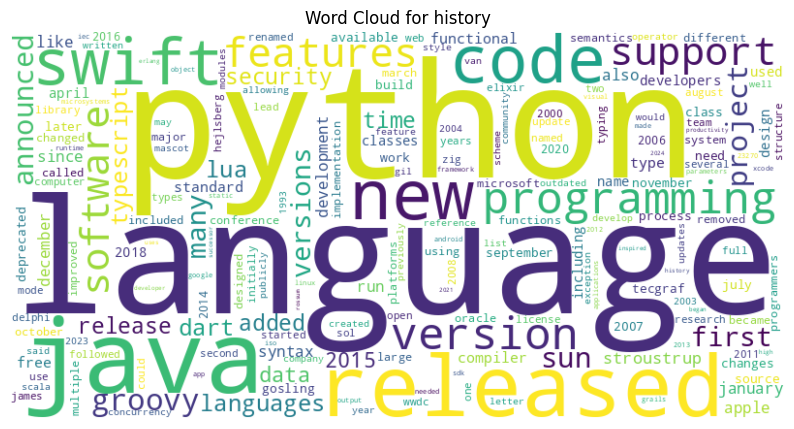



--- Keyword Analysis for 'features' ---

Top 20 keywords in 'features':
language: 15
type: 14
code: 13
programming: 11
syntax: 11
groovy: 10
features: 9
support: 8
haskell: 8
java: 8
data: 7
languages: 7
lua: 7
functions: 6
native: 6
types: 6
class: 6
static: 5
side: 5
also: 5


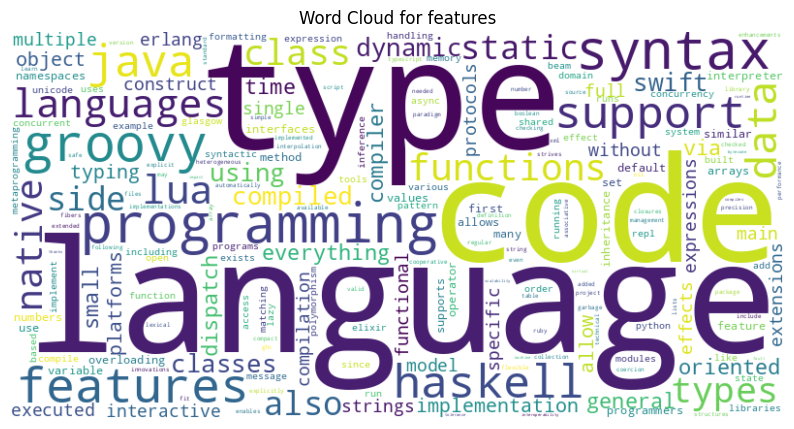



--- Keyword Analysis for 'document' ---

Top 20 keywords in 'document':
retrieved: 2095
original: 1089
archived: 1074
language: 1002
php: 851
programming: 689
python: 685
code: 660
java: 608
type: 567
2020: 510
may: 469
2024: 462
april: 462
2023: 444
net: 430
2021: 414
scala: 395
function: 384
2019: 373


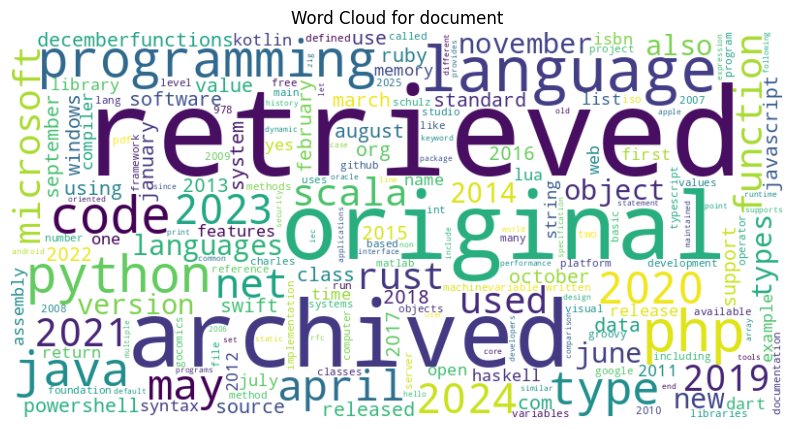



--- Keyword Analysis for 'paradigm' ---

Top 20 keywords in 'paradigm':
functional: 22
oriented: 22
imperative: 22
multi: 20
paradigm: 20
object: 19
reflective: 10
concurrent: 9
procedural: 9
structured: 7
generic: 6
driven: 3
array: 2
based: 2
block: 2
declarative: 2
scripting: 2
event: 2
distributed: 1
process: 1


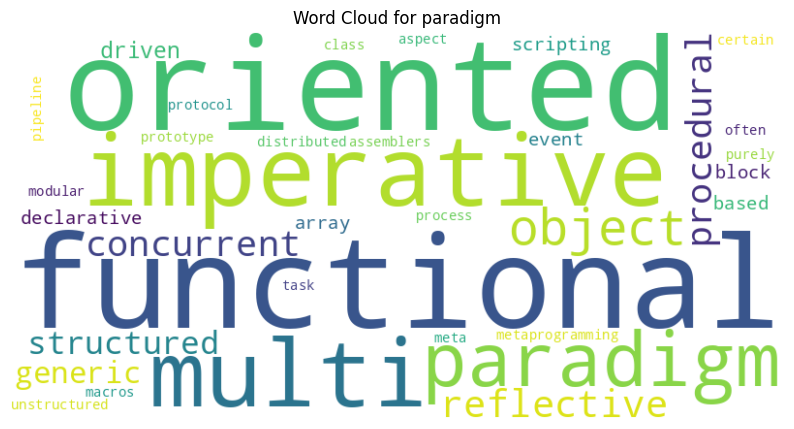



--- Keyword Analysis for 'first_appeared' ---

Top 20 keywords in 'first_appeared':
years: 23
ago: 23
1995: 8
2012: 6
1993: 4
2011: 4
january: 2
february: 2
1991: 2
2016: 2
2004: 2
1990: 2
november: 2
2006: 2
1947: 2
june: 2
2014: 2
2000: 2
1972: 2
october: 2


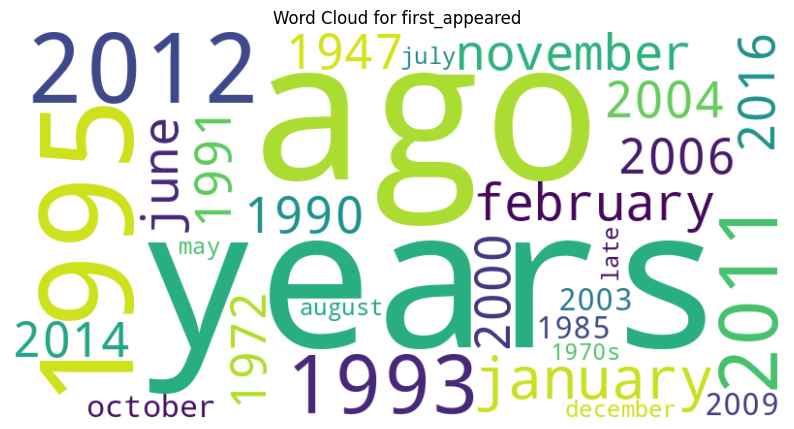



--- Keyword Analysis for 'stable_release' ---

Top 20 keywords in 'stable_release':
may: 2
2025: 2
2024: 2
r2024b: 1
edit: 1
wikidata: 1
haskell: 1
2010: 1
java: 1
c23: 1
days: 1
ago: 1
ecmascript: 1
iso: 1
iec: 1
14882: 1


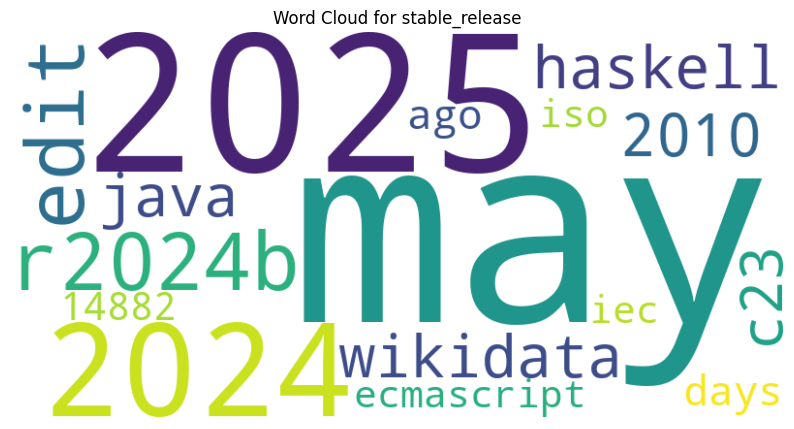



--- Keyword Analysis for 'typing_discipline' ---

Top 20 keywords in 'typing_discipline':
strong: 18
static: 13
dynamic: 11
inferred: 10
duck: 6
weak: 4
structural: 4
nominal: 3
safe: 3
nominative: 3
optional: 2
manifest: 2
gradual: 2
affine: 1
type: 1
annotations: 1
since: 1
hints: 1
ignored: 1
except: 1


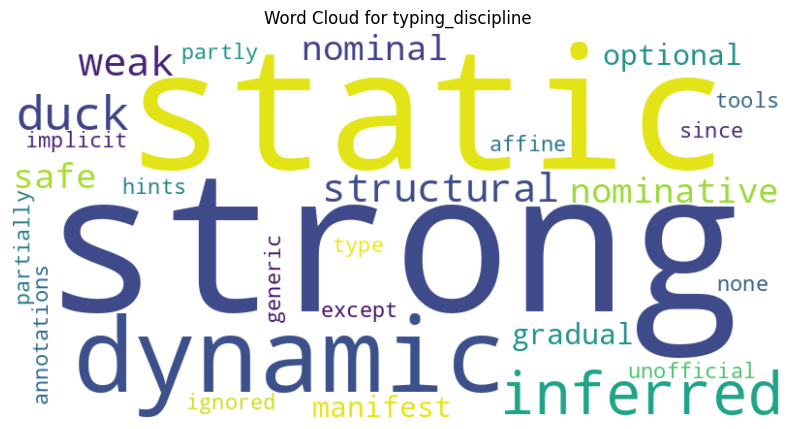



--- Keyword Analysis for 'influenced_by' ---

Top 20 keywords in 'influenced_by':
java: 8
clu: 7
modula: 7
smalltalk: 7
scheme: 6
lisp: 6
ruby: 5
haskell: 5
eiffel: 5
python: 5
javascript: 5
erlang: 4
standard: 4
ada: 4
perl: 4
oberon: 4
pascal: 4
apl: 3
mesa: 3
algol: 3


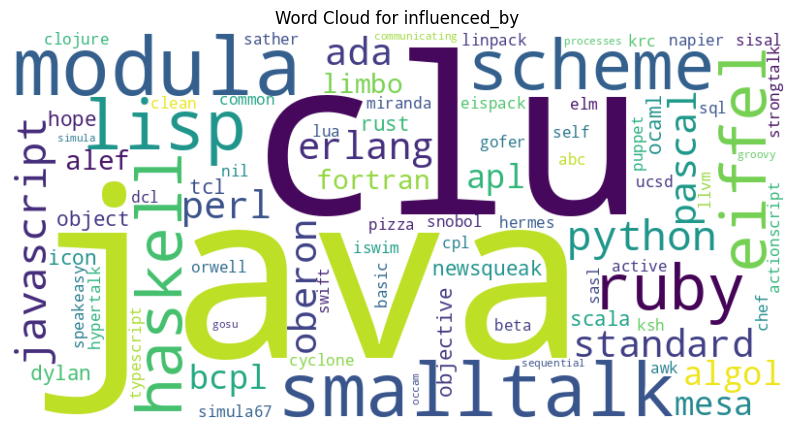



--- Keyword Analysis for 'influenced' ---

Top 20 keywords in 'influenced':
julia: 6
rust: 6
swift: 5
clojure: 5
coffeescript: 4
javascript: 4
kotlin: 4
hack: 4
java: 4
python: 4
groovy: 3
nim: 3
ring: 3
arkts: 3
chapel: 3
php: 3
seed7: 3
vala: 3
vlang: 3
crystal: 3


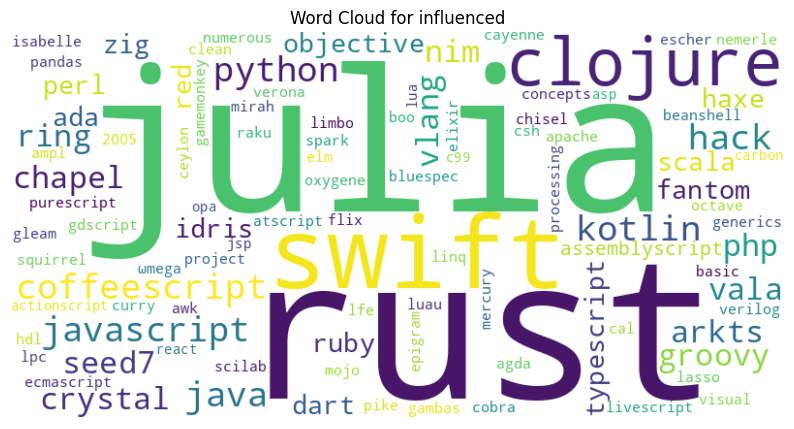



--- Keyword Analysis for 'syntax' ---

Top 20 keywords in 'syntax':
php: 30
syntax: 21
variable: 21
code: 18
line: 17
variables: 16
hello: 14
world: 14
statement: 13
used: 12
java: 11
value: 11
function: 11
statements: 10
language: 9
end: 9
methods: 9
functions: 9
class: 9
comments: 8


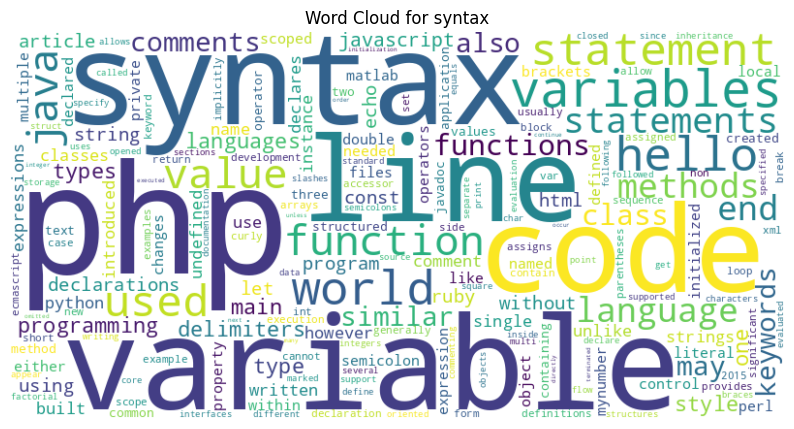



--- Keyword Analysis for 'functions' ---

Top 20 keywords in 'functions':
function: 33
php: 20
functions: 13
print: 11
return: 8
new: 7
also: 7
getadder: 7
example: 6
argument: 6
closure: 6
adder: 6
type: 6
name: 5
rgbimage: 5
lua: 5
addto: 5
defined: 5
int: 5
since: 5


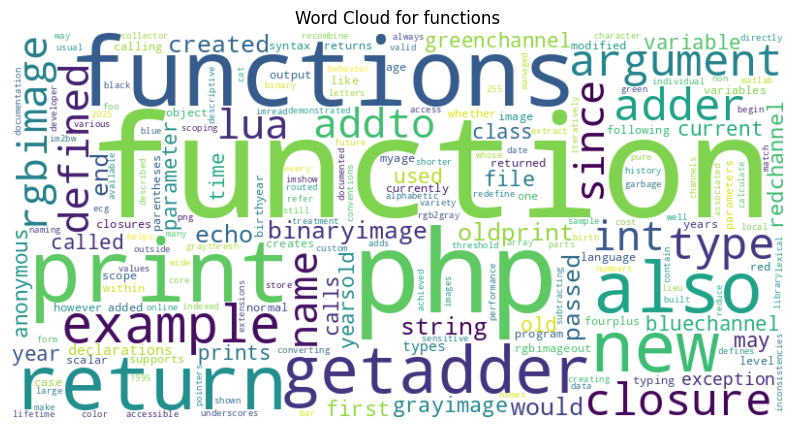



--- Keyword Analysis for 'generics' ---

Top 20 keywords in 'generics':
generic: 14
generics: 13
sum: 12
type: 11
code: 7
add: 7
class: 7
functions: 6
function: 6
programming: 6
allow: 5
types: 5
java: 5
container: 5
use: 4
num1: 4
num2: 4
time: 4
items: 4
new: 4


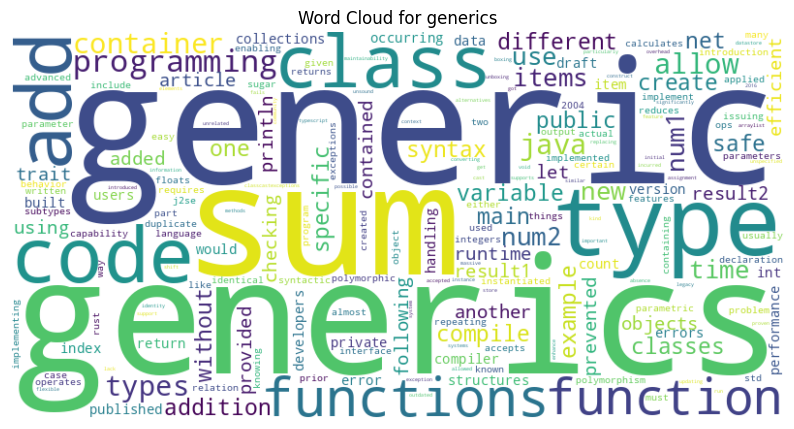



--- Keyword Analysis for 'memory_management' ---

Top 20 keywords in 'memory_management':
memory: 22
reference: 20
allocation: 19
stacy: 10
references: 9
automatic: 9
count: 8
objects: 8
static: 8
dynamic: 7
time: 7
program: 7
weak: 6
value: 6
name: 6
home: 6
address: 6
house21b: 6
instance: 5
deallocated: 5


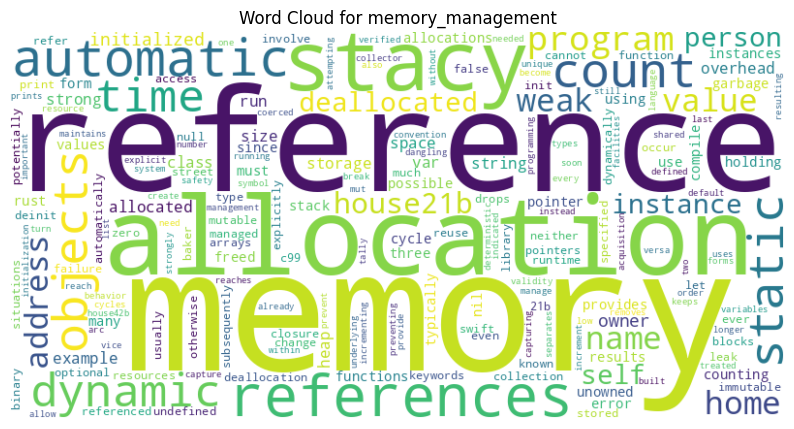



--- Keyword Analysis for 'compiler' ---

Top 20 keywords in 'compiler':
compiler: 11
zig: 10
also: 7
llvm: 6
self: 4
rust: 3
code: 3
used: 3
platforms: 3
cross: 3
like: 3
support: 3
written: 3
backend: 3
hosted: 3
linker: 2
supports: 2
using: 2
alternative: 2
backends: 2


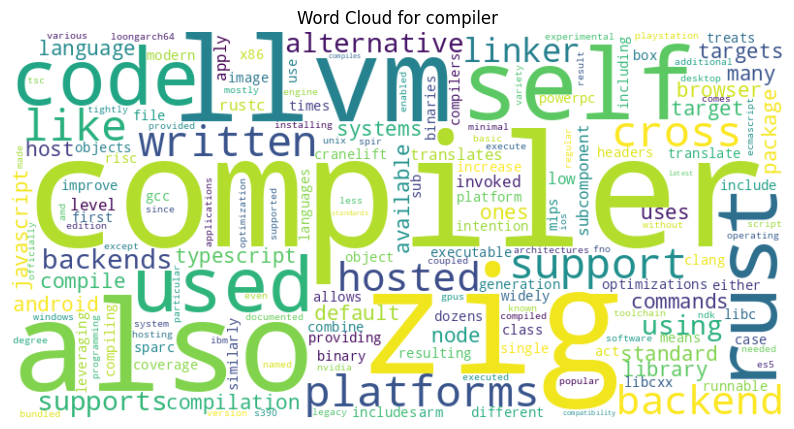



--- Keyword Analysis for 'performance' ---

Top 20 keywords in 'performance':
rust: 8
performance: 8
java: 8
python: 7
memory: 6
code: 5
improved: 4
safe: 3
runtime: 3
default: 3
written: 3
used: 3
time: 3
implementations: 3
tasks: 3
also: 3
addition: 3
language: 3
compilation: 3
since: 2


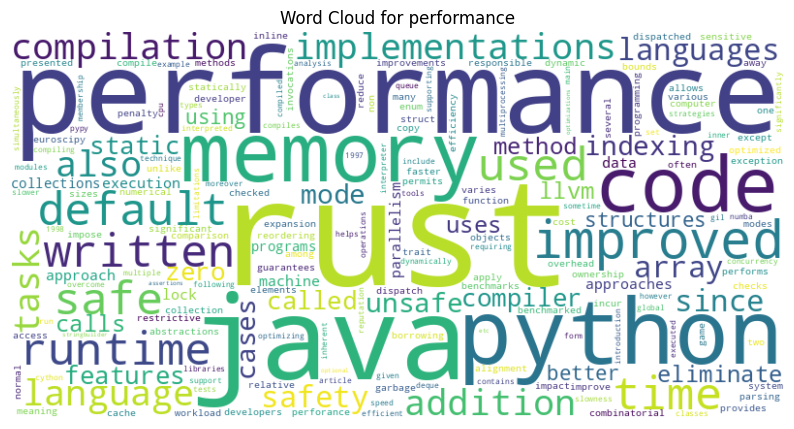



--- Keyword Analysis for 'adoption' ---

Top 20 keywords in 'adoption':
rust: 29
groovy: 19
uses: 14
used: 11
language: 9
system: 8
open: 7
development: 7
components: 6
source: 6
kotlin: 6
software: 5
web: 5
services: 5
platform: 5
project: 5
operating: 5
developers: 5
also: 4
programming: 4


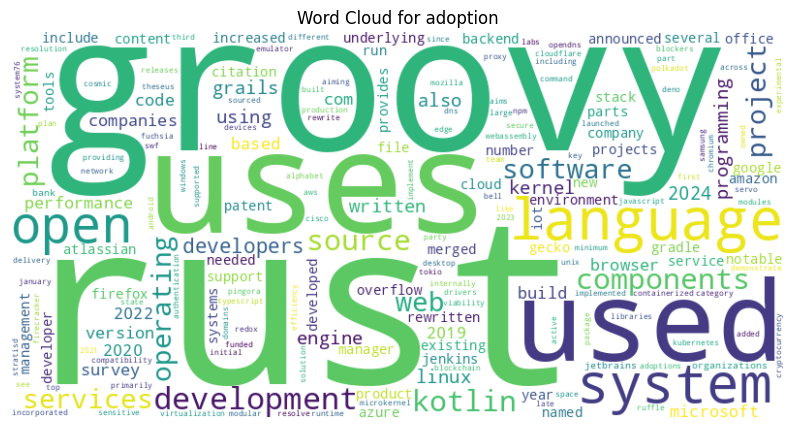



--- Keyword Analysis for 'typing' ---

Top 20 keywords in 'typing':
type: 18
types: 18
immutable: 13
python: 9
string: 7
classes: 7
typed: 6
number: 6
value: 6
true: 6
object: 5
supports: 5
contain: 5
mixed: 5
may: 4
new: 4
used: 4
bool: 4
boolean: 4
bytearray: 4


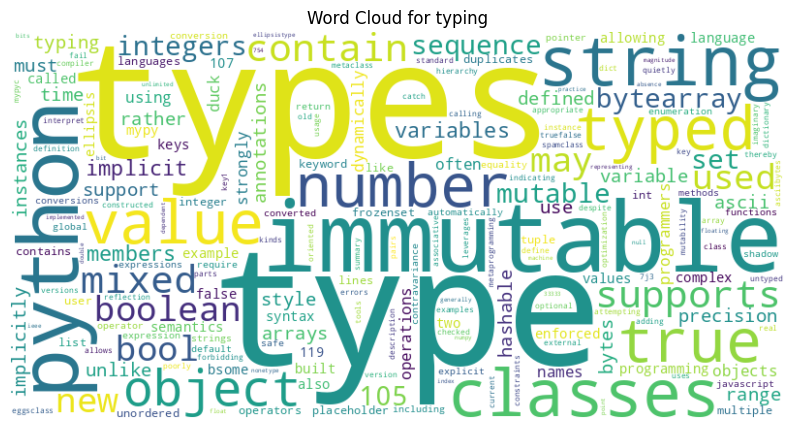



--- Keyword Analysis for 'libraries' ---

Top 20 keywords in 'libraries':
library: 18
standard: 9
libraries: 7
functions: 6
python: 5
used: 5
many: 4
language: 4
interfaces: 4
common: 4
web: 3
implementation: 3
code: 3
must: 3
frameworks: 3
set: 3
cli: 3
provide: 3
file: 3
program: 3


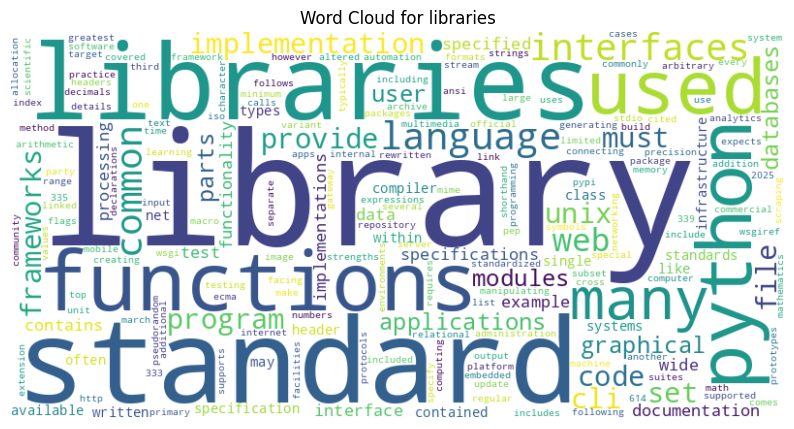



--- Keyword Analysis for 'implementations' ---

Top 20 keywords in 'implementations':
java: 28
implementation: 27
php: 27
haskell: 19
implementations: 15
source: 15
compiler: 15
code: 14
net: 13
language: 12
also: 11
open: 11
microsoft: 10
zend: 10
bytecode: 9
machine: 8
compiles: 8
intermediate: 7
platform: 7
developed: 7


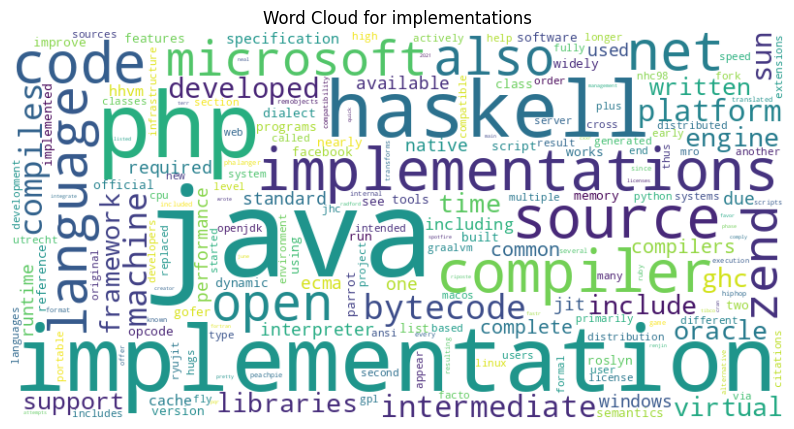



--- Keyword Analysis for 'hello_world' ---

Top 20 keywords in 'hello_world':
program: 15
hello: 14
world: 14
main: 14
class: 11
console: 11
static: 9
method: 8
void: 7
system: 7
code: 5
line: 5
example: 4
output: 4
string: 4
using: 4
writeline: 4
namespace: 4
instance: 4
std: 3


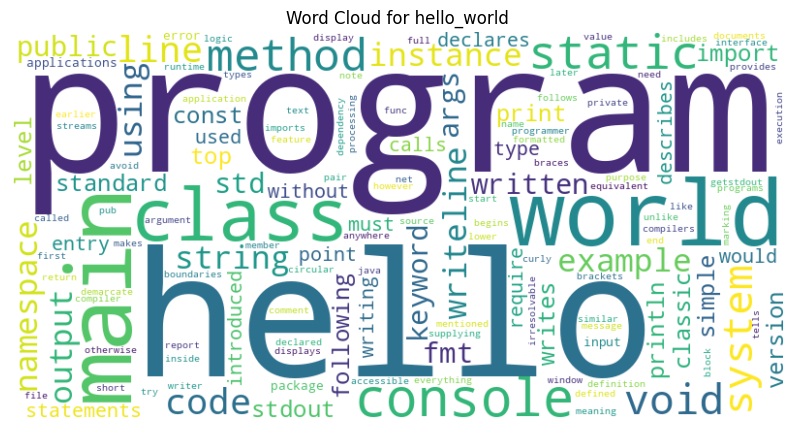



--- Keyword Analysis for 'concurrency' ---

Top 20 keywords in 'concurrency':
actor: 11
async: 10
await: 10
let: 10
scala: 8
string: 8
downloadtext: 8
name: 8
parallel: 6
function: 6
program: 6
tasks: 6
word: 6
concurrency: 5
may: 5
message: 5
println: 5
time: 5
func: 5
state: 5


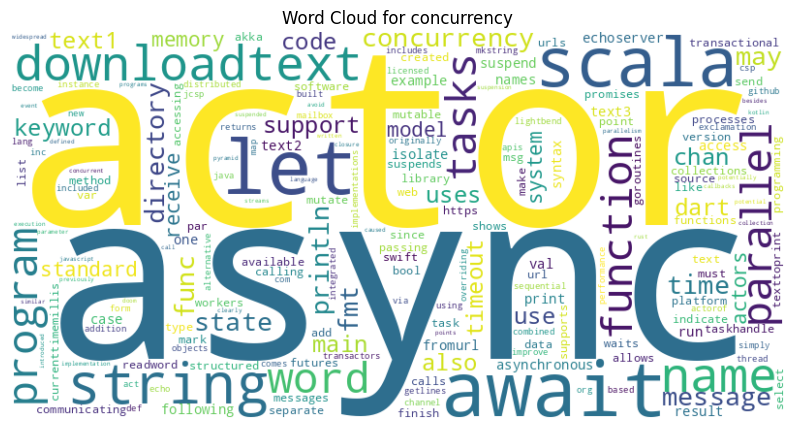



--- Keyword Analysis for 'criticism' ---

Top 20 keywords in 'criticism':
haskell: 9
java: 6
lazy: 5
evaluation: 5
scala: 4
system: 4
implementation: 4
new: 3
also: 3
use: 3
type: 3
error: 3
messages: 3
default: 3
reasoning: 3
data: 3
standard: 3
cabal: 3
jpa: 3
2011: 2


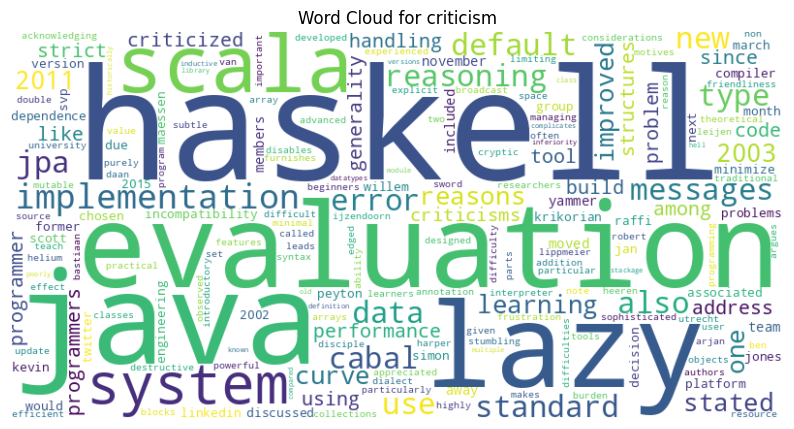



--- Keyword Analysis for 'design' ---

Top 20 keywords in 'design':
kotlin: 8
code: 6
type: 6
variable: 6
powershell: 5
javascript: 5
functionality: 4
instead: 4
typescript: 4
language: 4
declarations: 4
ecmascript: 3
classes: 3
inheritance: 3
languages: 3
var: 3
statement: 3
default: 3
java: 3
support: 3


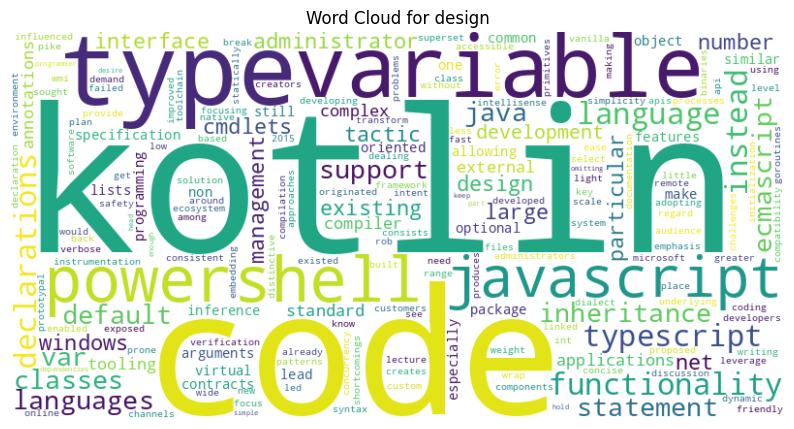



--- Keyword Analysis for 'applications' ---

Top 20 keywords in 'applications':
kotlin: 19
language: 10
lua: 9
android: 7
use: 6
applications: 5
using: 5
game: 5
scripting: 5
development: 4
used: 4
many: 4
support: 4
programming: 4
software: 4
web: 4
server: 4
google: 4
apps: 4
added: 3


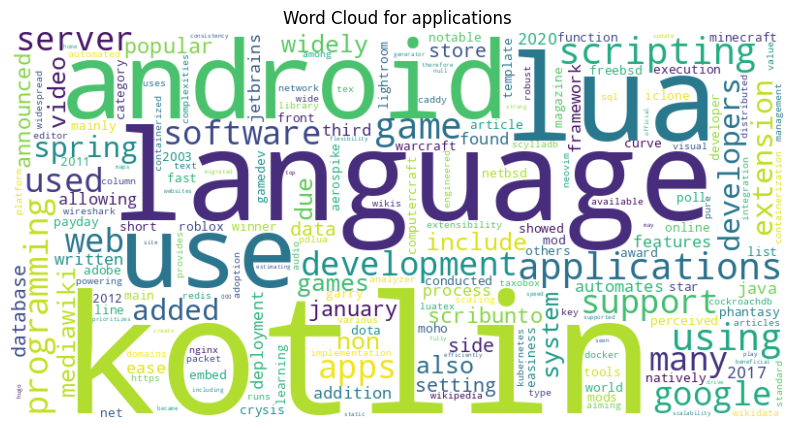

In [6]:
# Perform keyword analysis on each text column
for column in text_columns:
    print(f"\n\n--- Keyword Analysis for '{column}' ---")
    
    # Extract all keywords from the column
    all_keywords = []
    for text in df[column].dropna():
        all_keywords.extend(extract_keywords(text))
    
    # Count keyword frequencies
    keyword_counts = Counter(all_keywords)
    
    # Display top keywords
    print(f"\nTop 20 keywords in '{column}':")
    for word, count in keyword_counts.most_common(20):
        print(f"{word}: {count}")
    
    # Create word cloud
    if keyword_counts:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {column}')
        plt.show()

In [7]:
# Advanced analysis: Bi-grams (pairs of words that frequently appear together)
def extract_bigrams(text):
    if not isinstance(text, str):
        return []
    
    # Clean text
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    words = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words and len(word) >= 3]
    
    # Create bi-grams
    bigrams = []
    for i in range(len(filtered_words) - 1):
        bigrams.append((filtered_words[i], filtered_words[i + 1]))
    
    return bigrams

# Analyze bi-grams for the first text column (if any exist)
if text_columns:
    main_text_column = text_columns[0]
    print(f"\n\n--- Bi-gram Analysis for '{main_text_column}' ---")
    
    all_bigrams = []
    for text in df[main_text_column].dropna():
        all_bigrams.extend(extract_bigrams(text))
    
    bigram_counts = Counter(all_bigrams)
    
    print("\nTop 15 bi-grams:")
    for bigram, count in bigram_counts.most_common(15):
        print(f"{bigram[0]} {bigram[1]}: {count}")



--- Bi-gram Analysis for 'history' ---

Top 15 bi-grams:
programming language: 13
typescript released: 7
new features: 6
version released: 5
swift released: 5
new language: 5
released october: 4
functional programming: 4
james gosling: 4
sun microsystems: 4
iso iec: 4
source code: 4
software development: 4
van rossum: 3
python released: 3


In [8]:
# Knowledge representation features identification
print("\n\n--- Potential Knowledge Representation Features ---")

# Look for structured patterns in the data
structured_features = []

# Check for categorical columns
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            # Try to count unique values, skip columns with unhashable types
            unique_vals = df[col].nunique()
            if 1 < unique_vals < len(df) * 0.5:  # Heuristic for categorical data
                categorical_cols.append((col, unique_vals))
        except TypeError:
            # This column contains unhashable types (like lists)
            print(f"Note: Column '{col}' contains unhashable types (possibly lists) - skipping for categorical analysis")
            continue

if categorical_cols:
    print("\nPotential categorical features for knowledge representation:")
    for col, unique_count in sorted(categorical_cols, key=lambda x: x[1]):
        print(f"- {col}: {unique_count} unique values")
        if unique_count < 20:  # Show values if there aren't too many
            try:
                print(f"  Values: {', '.join(map(str, df[col].dropna().unique()[:10]))}")
                if df[col].nunique() > 10:
                    print("  (and more...)")
            except:
                print("  (Unable to display values due to complex data types)")

# Look for numerical features that might indicate importance
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
if len(numerical_cols) > 0:
    print("\nNumerical features that could indicate importance:")
    for col in numerical_cols:
        print(f"- {col}: range from {df[col].min()} to {df[col].max()}")

# Look for relationship indicators
print("\nPotential relationship indicators in the data:")
for col in df.columns:
    if isinstance(col, str) and any(term in col.lower() for term in ['id', 'ref', 'link', 'relation', 'parent']):
        print(f"- {col}: could indicate relationships between entities")



--- Potential Knowledge Representation Features ---

Potential categorical features for knowledge representation:
- versioning: 2 unique values
  Values: Each of the minor versions supports a specific range of Erlang/OTP versions. The current stable release version is 1.18.3 ., Go 1 guarantees compatibility for the language specification and major parts of the standard library. All versions up through the current Go 1.24 release have maintained this promise. Go uses a go1.[major].[patch] versioning format, such as go1.24.0 and each major Go release is supported until there are two newer major releases. Unlike most software, Go calls the second number in a version the major, i.e., in go1.24.0 the 24 is the major version. This is because Go plans to never reach 2.0, prioritizing backwards compatibility over potential breaking changes.
- variables: 2 unique values
  Values: Variables are defined using the assignment operator, =. MATLAB is a weakly typed programming language because type